    No, Jae Won
    27037711

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# Problem 1: Python & Data Exploration

In [3]:
path_to_file = 'data/iris.txt'
iris = np.genfromtxt(path_to_file, delimiter=None) # Loading the text data file
X = iris[:, :-1]   # Features are the first 4 columns
Y = iris[:, -1]    # Classes are the last column

(1) Use X.shape to get the number of features and the number of data points. Report both numbers, mentioning which number is which.

In [4]:
print("Data Points:", X.shape[0])
print("Number of Features:", X.shape[1])

Data Points: 148
Number of Features: 4


(2) For each feature, plot a histogram ( plt.hist ) of the data values. 

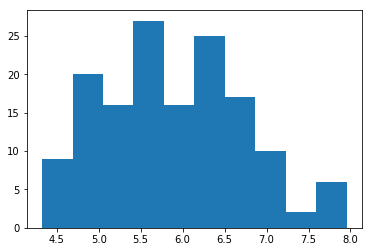

In [5]:
X1 = X[:,0]
plt.hist(X1)
plt.show()

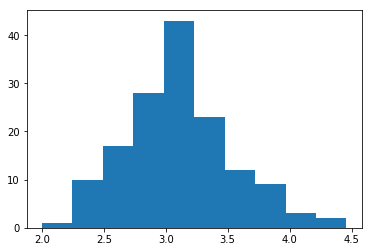

In [6]:
X2 = X[:,1]
plt.hist(X2)
plt.show()

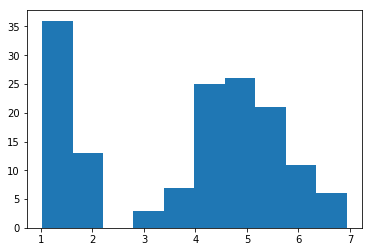

In [7]:
X3 = X[:,2]
plt.hist(X3)
plt.show()

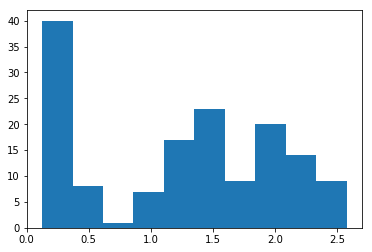

In [8]:
X4 = X[:,3]
plt.hist(X4)
plt.show()

(3) Compute the mean & standard deviation of the data points for each feature ( np.mean , np.std ).

In [9]:
print("Feature(1): Mean:", np.mean(X[:,0]), "SD:", np.std(X[:,0]))
print("Feature(2): Mean:", np.mean(X[:,1]), "SD:", np.std(X[:,1]))
print("Feature(3): Mean:", np.mean(X[:,2]), "SD:", np.std(X[:,2]))
print("Feature(4): Mean:", np.mean(X[:,3]), "SD:", np.std(X[:,3]))

Feature(1): Mean: 5.90010376419 SD: 0.833402066775
Feature(2): Mean: 3.09893091689 SD: 0.436291838001
Feature(3): Mean: 3.81955484054 SD: 1.75405710934
Feature(4): Mean: 1.25255548459 SD: 0.758772457026


(4) For each pair of features (1,2), (1,3), and (1,4), plot a scatterplot (see plt.plot or plt.scatter ) of the
feature values, colored according to their target value (class). (For example, plot all data points with y = 0
as blue, y = 1 as green, and y = 2 as red.)

    Feature (1,2)

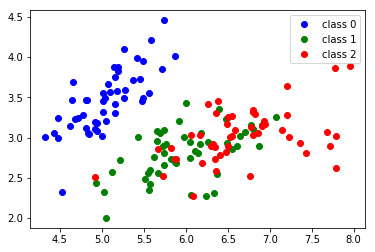

In [10]:
colors = ['blue', 'green', 'red']

for i in np.unique(Y):
    plt.plot(X[Y==i,0], X[Y==i,1], 'o', color = colors[int(i)], label='class %d' %i)
plt.legend()
plt.show()

    Feature (1,3)

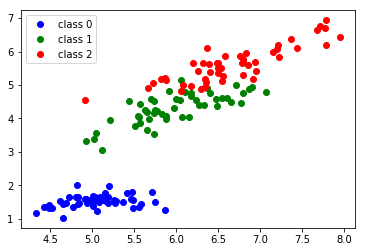

In [11]:
for i in np.unique(Y):
    plt.plot(X[Y==i,0], X[Y==i,2], 'o', color = colors[int(i)], label='class %d' %i)
plt.legend()
plt.show()

    Feature (1,4)

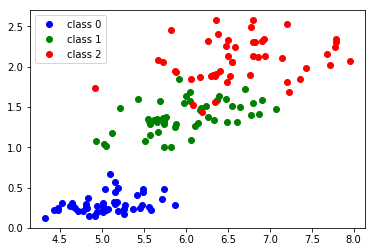

In [12]:
for i in np.unique(Y):
    plt.plot(X[Y==i,0], X[Y==i,3], 'o', color = colors[int(i)], label='class %d' %i)
plt.legend()
plt.show()

# Problem 2: k-nearest-neighbor predictions 

In [13]:
import mltools as ml

iris = np.genfromtxt(path_to_file, delimiter=None) # Loading the text data file
X = iris[:, 0:2]
Y = iris[:, -1]    # Classes are the last column

X, Y = ml.shuffleData(X, Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.75)

K = [1, 5, 10, 50]

knn = ml.knn.knnClassify()

(1) Modify the code listed above to use only the first two features of X (e.g., let X be only the first two columns
of iris , instead of the first four), and visualize (plot) the classification boundary for varying values of
K = [1, 5, 10, 50] using plotClassify2D.

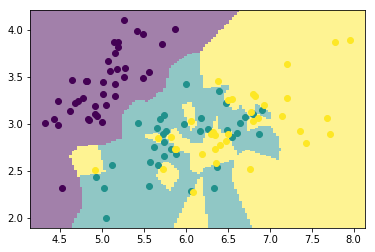

In [14]:
knn.train(Xtr, Ytr, K[0])
ml.plotClassify2D(knn, Xtr, Ytr)

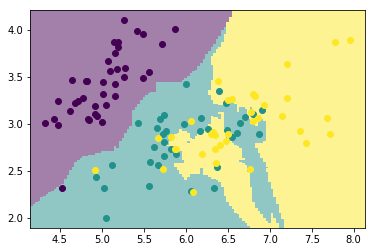

In [15]:
knn.train(Xtr, Ytr, K[1])
ml.plotClassify2D(knn, Xtr, Ytr)

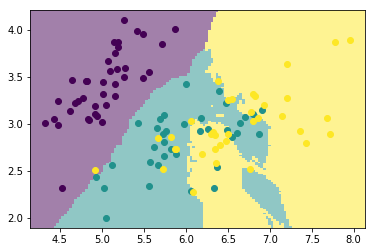

In [16]:
knn.train(Xtr, Ytr, K[2])
ml.plotClassify2D(knn, Xtr, Ytr)

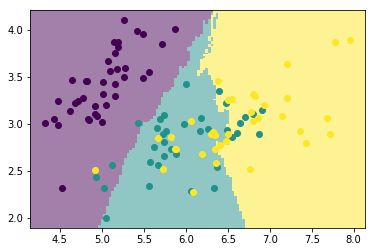

In [17]:
knn.train(Xtr, Ytr, K[3])
ml.plotClassify2D(knn, Xtr, Ytr)

(2) Again using only the first two features, compute the error rate (number of misclassifications) on both the
training and validation data as a function of K = [1, 2, 5, 10, 50, 100, 200]. You can do this most easily with
a for-loop:

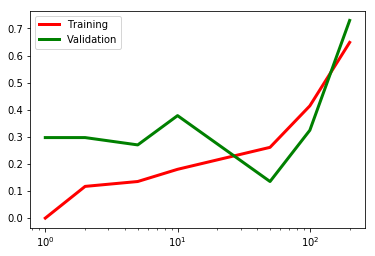

In [18]:
K=[1,2,5,10,50,100,200];
errTrain = np.arange(7.0)
errValid = np.arange(7.0)

for i,k in enumerate(K):
    learner = ml.knn.knnClassify() # TODO: complete code to train model
    learner.train(Xtr, Ytr, k)
    errTrain[i] = learner.err(Xtr, Ytr) # TODO: count what fraction of predictions are wrong
    errValid[i] = learner.err(Xva, Yva)
    #TODO: repeat prediction / error evaluation for validation data
    
plt.semilogx(K, errTrain, 'r-', lw=3, label='Training') #TODO: average and plot results on semi-log scale
plt.semilogx(K, errValid, 'g-', lw=3, label='Validation')

plt.legend()
plt.show()

Best value of K would be 50 since it has low validation

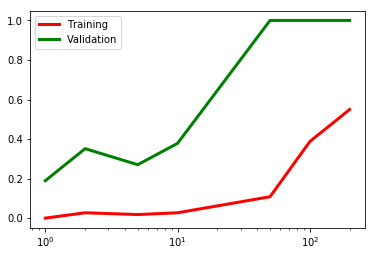

In [19]:
X = iris[:, :-1]
Y = iris[:, -1]    # Classes are the last column

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.75)

errTrain = np.arange(7.0)
errValid = np.arange(7.0)


for i,k in enumerate(K):
    learner = ml.knn.knnClassify() # TODO: complete code to train model
    learner.train(Xtr, Ytr, k)
    errTrain[i] = learner.err(Xtr, Ytr) # TODO: count what fraction of predictions are wrong
    errValid[i] = learner.err(Xva, Yva)
    #TODO: repeat prediction / error evaluation for validation data
    
plt.semilogx(K, errTrain, 'r-', lw=3, label='Training') #TODO: average and plot results on semi-log scale
plt.semilogx(K, errValid, 'g-', lw=3, label='Validation')

plt.legend()

plt.show()

The plots are very different where the difference of Training and Validation is significantly larger. Best value of K would be 5

# Problem 3: Naïve Bayes Classifiers